![logo](../../../LogoLine_horizon_C3S.png)

# Bias in extreme temperature indices for the reinsurance sector

Production date: 29-05-2024

Produced by: CMCC foundation - Euro-Mediterranean Center on Climate Change. Albert Martinez Boti.

## 🌍 Use case: Defining a strategy to optimise reinsurance protections  


## ❓ Quality assessment question
* **How well do CORDEX projections represent climatology and trends of air temperature extremes in Europe?**
* **Do I get different results than if I use CMIP6 projections?**

Climate change has a major impact on the reinsurance market [[1]](https://doi.org/10.3390/atmos11020146)[[2]](https://doi.org/10.5194/nhess-22-659-2022). In the third assessment report of the IPCC, hot temperature extremes were already presented as relevant to insurance and related services [[3]](https://www.ipcc.ch/site/assets/uploads/2018/03/wg2TARchap8.pdf). Consequently, the need for reliable regional and global climate projections has become paramount, offering valuable insights for optimising reinsurance strategies in the face of a changing climate landscape. Nonetheless, despite their pivotal role, uncertainties inherent in these projections can potentially lead to misuse [[4]](https://doi.org/10.1002/wcc.71)[[5]](https://doi.org/10.1002/wcc.579). This underscores the importance of accurately calculating and accounting for uncertainties to ensure their appropriate consideration. This notebook utilises data from a subset of models from **[CORDEX](https://cds.climate.copernicus.eu/datasets/projections-cordex-domains-single-levels?tab=overview)** Regional Climate Models (RCMs) and compares them with [ERA5](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-complete?tab=doc) reanalysis, serving as the reference product. Two maximum-temperature-based indices from [ECA&D](https://www.ecad.eu/indicesextremes/) indices (one of physical nature and the other of statistical nature) are computed using the [icclim](https://icclim.readthedocs.io/en/stable/) Python package. The first index, identified by the ETCCDI short name 'SU', quantifies the occurrence of summer days (i.e., with daily maximum temperatures exceeding 25°C) within a year or a season (JJA in this notebook). The second index, labeled 'TX90p', describes the number of days with daily maximum temperatures exceeding the daily 90th percentile of maximum temperature for a 5-day moving window. Within this notebook, these calculations are performed over the historical period spanning from 1971 to 2000. It is important to note that the results presented here pertain to a specific subset of the CORDEX ensemble and may not be generalisable to the entire dataset. Also note that a separate assessment examines the representation of trends of these indices for the same models during a fixed future period (2015-2099).


## 📢 Quality assessment statement
```{admonition} These are the key outcomes of this assessment
:class: note
* During the JJA period and for the subset of regional models considered, CORDEX projections offer valuable insights into reproducing the climatology and trend of air temperature extremes across Europe for the historical period spanning from 1971 to 2000. These insights aid in the optimisation of reinsurance protections. Nevertheless, they are accompanied by uncertainties that necessitate careful consideration for informed decision-making. Users need to understand that biases affect the climatology and trend of the indices differently and that the choice of bias correction method should be tailored accordingly [[6]](https://doi.org/10.1002/asl.1072)[[7]](https://ibicus.readthedocs.io/en/latest/).
  
* The subset of Regional Climate Models (RCMs) consistently show a tendency to underestimate trends for the 'SU' and 'TX90p' indices compared to ERA5 during the JJA period. This underestimation of the trend magnitude is even greater than observed for another CMIP6 assessment that is performed for the same period and seasonal aggregation  ("CMIP6 Climate Projections: evaluating bias in extreme temperature indices for the reinsurance sector."). While RCMs improve mean values compared to Global Climate Models (GCMs), they often struggle to replicate historical trends accurately, particularly underestimating in the Mediterranean basin. These findings underscore the importance of a comprehensive GCM-RCM matrix to address uncertainties effectively.

* In contrast to climatological assessments, the consistency in trend bias patterns across diverse RCMs suggests a potential dependence on the driving GCM, shared among all RCMs. A more extensive GCM-RCM matrix is imperative to accurately quantify this dependency and delineate the partitioning of uncertainty between GCMs and RCMs [[8]](https://doi.org/10.1002/wcc.8)[[9]](https://doi.org/10.1088/1748-9326/aacc77).

* The outcomes of this notebook also increase confidence (though they do not ensure accuracy) when analysing future trends using these models.
```

```{figure} f986e53c-d903-459a-8a4a-02caea9644da.png
---
alt: Mean Bias SU CORDEX
width: 900px
---
Number of summer days ('SU') for the temporal aggregation of 'JJA'. Mean bias for the historical period (1971 - 2000) of each individual CORDEX model.
```

## 📋 Methodology
This notebook provides an assessment of the systematic errors (trend and climate mean) in a subset of 9 models from [CORDEX](https://cds.climate.copernicus.eu/datasets/projections-cordex-domains-single-levels?tab=overview). It achieves this by comparing the model predictions with the ERA5 reanalysis for the maximum-temperature-based indices of 'SU' and 'TX90p', calculated over the temporal aggregation of JJA and for the historical period spanning from 1971 to 2000. In particular, spatial patterns of climate mean and trend, along with biases, are examined and displayed for each model and the ensemble median (calculated for each grid cell). Additionally, spatially-averaged trend values are analysed and presented using box plots to provide an overview of trend behavior across the distribution of the chosen subset of models when averaged across Europe.

The analysis and results follow the next outline:

**[](climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-1)**
 * [](climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-1.1)
 * [](climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-1.2)
 * [](climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-1.3)
 * [](climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-1.4)
 * [](climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-1.5)
 * [](climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-1.6)

**[](climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-2)**
 * [](climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-2.1)
 * [](climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-2.2)
 * [](climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-2.3)

**[3. Plot and describe results](climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-3)**
 * [](climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-3.1)
 * [](climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-3.2)
 * [](climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-3.3)
 * [](climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-3.4)
 * [](climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-3.5)
 * [](climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-3.6)

## 📈 Analysis and results

(climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-1)=
### 1. Parameters, requests and functions definition

(climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-1.1)=
#### 1.1. Import packages

In [1]:
import math
import tempfile
import warnings
import textwrap
warnings.filterwarnings("ignore")

import cartopy.crs as ccrs
import icclim
import matplotlib.pyplot as plt
import xarray as xr
from c3s_eqc_automatic_quality_control import diagnostics, download, plot, utils
from xarrayMannKendall import Mann_Kendall_test

plt.style.use("seaborn-v0_8-notebook")
plt.rcParams["hatch.linewidth"] = 0.5

(climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-1.2)=
#### 1.2. Define Parameters

In the "Define Parameters" section, various customisable options for the notebook are specified:

- The initial and ending year used for the historical period can be specified by changing the parameters `year_start` and `year_stop` (1971-2000 is chosen for consistency between CORDEX and CMIP6).
- The `timeseries` set the temporal aggregation. For instance, selecting "JJA" implies considering only the JJA season.
- `collection_id` provides the choice between Global Climate Models CMIP6 or Regional Climate Models CORDEX. Although the code allows choosing between CMIP6 or CORDEX, the example provided in this notebook deals with CORDEX RCMs.
- `area` allows specifying the geographical domain of interest.
- The `interpolation_method` parameter allows selecting the interpolation method when regridding is performed over the indices.
- The `chunk` selection allows the user to define if dividing into chunks when downloading the data on their local machine. Although it does not significantly affect the analysis, it is recommended to keep the default value for optimal performance.

In [2]:
# Time period
year_start = 1971
year_stop = 2000
assert year_start >= 1971

# Choose annual or seasonal timeseries
timeseries = "JJA"
assert timeseries in ("annual", "DJF", "MAM", "JJA", "SON")

# Variable
variable = "temperature"
assert variable in ("temperature", "precipitation")

# Choose CORDEX or CMIP6
collection_id = "CORDEX"
assert collection_id in ("CORDEX", "CMIP6")

# Interpolation method
interpolation_method = "bilinear"

# Area to show
area = [72, -22, 27, 45]

# Chunks for download
chunks = {"year": 1}

(climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-1.3)=
#### 1.3. Define models

The following climate analyses are performed considering a subset of GCMs from CORDEX. Models names are listed in the parameters below. Some variable-dependent parameters are also selected, as the `index_names` parameter, which specifies the temperature-based indices ('SU' and 'TX90p' in our case) from the [icclim](https://icclim.readthedocs.io/en/stable/) Python package.

When choosing Cordex models, it is crucial to consider the availability of RCMs for the selected GCM and the specified region. The listed RCMs, for instance, are accessible for the GCM “mpi_m_mpi_esm_lr” in the “europe” cordex_domain. To confirm the available combinations, refer to the [CORDEX](https://cds.climate.copernicus.eu/datasets/projections-cordex-domains-single-levels?tab=overview) CDS catalogue entry.

In [3]:
models_cordex = (
    "clmcom_clm_cclm4_8_17",
    "clmcom_eth_cosmo_crclim",
    "cnrm_aladin63",
    "dmi_hirham5",
    "knmi_racmo22e",
    "mohc_hadrem3_ga7_05",
    "mpi_csc_remo2009",
    "smhi_rca4",
    "uhoh_wrf361h",
)

match variable:
    case "temperature":
        resample_reduction = "max"
        index_names = ("SU", "TX90p")
        era5_variable = "2m_temperature"
        cordex_variable = "maximum_2m_temperature_in_the_last_24_hours"
        cmip6_variable = "daily_maximum_near_surface_air_temperature"
        models_cmip6 = (
            "access_cm2",
            "awi_cm_1_1_mr",
            "cmcc_esm2",
            "cnrm_cm6_1_hr",
            "ec_earth3_cc",
            "gfdl_esm4",
            "inm_cm5_0",
            "miroc6",
            "mpi_esm1_2_lr",
        )
        
        # Colormaps
        cmaps="viridis"
        cmaps_trend = cmaps_bias = "RdBu_r"
        #Define dictionaries to use in titles and caption
        long_name = {
            "SU":"Number of summer days",
            "TX90p":"Number of days with daily maximum temperatures exceeding the daily 90th percentile of maximum temperature for a 5-day moving window",
        }
    case "precipitation":
        resample_reduction = "sum"
        index_names = ("CWD", "R20mm", "RR1", "RX1day", "RX5day")
        era5_variable = "total_precipitation"
        cordex_variable = "mean_precipitation_flux"
        cmip6_variable = "precipitation"
        models_cmip6 = (
            "access_cm2",
            "bcc_csm2_mr",
            "cmcc_esm2",
            "cnrm_cm6_1_hr",
            "ec_earth3_cc",
            "gfdl_esm4",
            "inm_cm5_0",
            "miroc6",
            "mpi_esm1_2_lr",
        )
        # Colormaps
        cmaps="Blues"
        cmaps_trend = cmaps_bias = "RdBu"
        
        #Define dictionaries to use in titles and caption
        long_name = {
            "RX1day": "Maximum 1-day total precipitation",
            "RX5day": "Maximum 5-day total precipitation",
            "RR1":"Number of wet days (Precip >= 1mm)",
            "R20mm":"Number of heavy precipitation days (Precip >= 20mm)",
            "CWD":"Maximum consecutive wet days",
        }
    case _:
        raise NotImplementedError(f"{variable=}")

(climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-1.4)=
#### 1.4. Define ERA5 request

Within this notebook, ERA5 serves as the reference product. In this section, we set the required parameters for the cds-api data-request of ERA5.

In [4]:
request_era = (
    "reanalysis-era5-single-levels",
    {
        "product_type": "reanalysis",
        "format": "netcdf",
        "time": [f"{hour:02d}:00" for hour in range(24)],
        "variable": era5_variable,
        "year": [
            str(year)
            for year in range(year_start - int(timeseries == "DJF"), year_stop + 1)
        ],  # Include D(year-1)
        "month": [f"{month:02d}" for month in range(1, 13)],
        "day": [f"{day:02d}" for day in range(1, 32)],
        "area": area,
    },
)

request_lsm = (
    request_era[0],
    request_era[1]
    | {
        "year": "1940",
        "month": "01",
        "day": "01",
        "time": "00:00",
        "variable": "land_sea_mask",
    },
)

(climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-1.5)=
#### 1.5. Define model requests

In this section we set the required parameters for the cds-api data-request.

The `get_cordex_years` function is employed to choose suitable data chunks for CORDEX data requests. 

When `Weights = True`, spatial weighting is applied for calculations requiring spatial data aggregation. This is particularly relevant for CMIP6 GCMs with regular lon-lat grids that do not consider varying surface extensions at different latitudes. In contrast, CORDEX RCMs, using rotated grids, inherently account for different cell surfaces based on latitude, eliminating the need for a latitude cosine multiplicative factor (`Weights = False`).

In [5]:
request_cordex = {
    "format": "zip",
    "domain": "europe",
    "experiment": "historical",
    "horizontal_resolution": "0_11_degree_x_0_11_degree",
    "temporal_resolution": "daily_mean",
    "variable": cordex_variable,
    "gcm_model": "mpi_m_mpi_esm_lr",
    "ensemble_member": "r1i1p1",
}

request_cmip6 = {
    "format": "zip",
    "temporal_resolution": "daily",
    "experiment": "historical",
    "variable": cmip6_variable,
    "year": [
        str(year) for year in range(year_start - 1, year_stop + 1)
    ],  # Include D(year-1)
    "month": [f"{month:02d}" for month in range(1, 13)],
    "day": [f"{day:02d}" for day in range(1, 32)],
    "area": area,
}


def get_cordex_years(
    year_start,
    year_stop,
    timeseries,
    start_years=list(range(1951, 2097, 5)),
    end_years=list(range(1955, 2101, 5)),
):
    start_year = []
    end_year = []
    years = set(range(year_start - int(timeseries == "DJF"), year_stop + 1))
    for start, end in zip(start_years, end_years):
        if years & set(range(start, end + 1)):
            start_year.append(start)
            end_year.append(end)
    return start_year, end_year


model_requests = {}
if collection_id == "CORDEX":
    for model in models_cordex:
        start_years = [1970 if model in ("smhi_rca4", "uhoh_wrf361h") else 1966] + list(
            range(1971, 2097, 5)
        )
        end_years = [1970] + list(range(1975, 2101, 5))
        model_requests[model] = (
            "projections-cordex-domains-single-levels",
            [
                {
                    "rcm_model": model,
                    **request_cordex,
                    "start_year": start_year,
                    "end_year": end_year,
                }
                for start_year, end_year in zip(
                    *get_cordex_years(
                        year_start,
                        year_stop,
                        timeseries,
                        start_years=start_years,
                        end_years=end_years,
                    )
                )
            ],
        )
elif collection_id == "CMIP6":
    for model in models_cmip6:
        model_requests[model] = (
            "projections-cmip6",
            download.split_request(request_cmip6 | {"model": model}, chunks=chunks),
        )
else:
    raise ValueError(f"{collection_id=}")

(climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-1.6)=
#### 1.6. Functions to cache

In this section, functions that will be executed in the caching phase are defined. Caching is the process of storing copies of files in a temporary storage location, so that they can be accessed more quickly. This process also checks if the user has already downloaded a file, avoiding redundant downloads.

Functions description:

- The `select_timeseries` function subsets the dataset based on the chosen `timeseries` parameter.
  
- The `compute_indices` function utilises the icclim package to calculate the selected maximum-temperature-based indices.

- The `compute_trends` function employs the Mann-Kendall test for trend calculation.

- Finally, the `compute_indices_and_trends` function selects the temporal aggregation using the `select_timeseries` function. It then computes daily maximum temperature (only if we are dealing with ERA5), calculates maximum-temperature-based indices via the `compute_indices` function, determines the indices mean over the historical period (1971-2000), obtain the trends using the `compute_trends` function, and offers an option for regridding to ERA5 if required.

In [6]:
def select_timeseries(ds, timeseries, year_start, year_stop, index_names):
    if timeseries == "annual":
        return ds.sel(time=slice(str(year_start), str(year_stop)))
    ds=ds.sel(time=slice(f"{year_start-1}-12", f"{year_stop}-11"))
    if "RX5day" in index_names:
        return ds
    return ds.where(ds["time"].dt.season == timeseries, drop=True)  
    
def compute_indices(ds, index_names, timeseries, tmpdir):
    labels, datasets = zip(*ds.groupby("time.year"))
    paths = [f"{tmpdir}/{label}.nc" for label in labels]
    datasets = [ds.chunk(-1) for ds in datasets]
    xr.save_mfdataset(datasets, paths)

    ds = xr.open_mfdataset(paths)
    in_files = f"{tmpdir}/rechunked.zarr"
    chunks = {dim: -1 if dim == "time" else "auto" for dim in ds.dims}
    ds.chunk(chunks).to_zarr(in_files)

    datasets = [
        icclim.index(
            index_name=index_name,
            in_files=in_files,
            out_file=f"{tmpdir}/{index_name}.nc",
            slice_mode="year" if timeseries == "annual" else timeseries,
        )
        for index_name in index_names
    ]

    return xr.merge(datasets).drop_dims("bounds")


def compute_trends(ds):
    datasets = []
    (lat,) = set(ds.dims) & set(ds.cf.axes["Y"])
    (lon,) = set(ds.dims) & set(ds.cf.axes["X"])
    coords_name = {
        "time": "time",
        "y": lat,
        "x": lon,
    }
    for index, da in ds.data_vars.items():
        ds = Mann_Kendall_test(
            da - da.mean("time"),
            alpha=0.05,
            method="theilslopes",
            coords_name=coords_name,
        ).compute()
        ds = ds.rename({k: v for k, v in coords_name.items() if k in ds.dims})
        ds = ds.assign_coords({dim: da[dim] for dim in ds.dims})
        datasets.append(ds.expand_dims(index=[index]))
    ds = xr.concat(datasets, "index")
    return ds


def add_bounds(ds):
    for coord in {"latitude", "longitude"} - set(ds.cf.bounds):
        ds = ds.cf.add_bounds(coord)
    return ds


def get_grid_out(request_grid_out, method):
    ds_regrid = download.download_and_transform(*request_grid_out)
    coords = ["latitude", "longitude"]
    if method == "conservative":
        ds_regrid = add_bounds(ds_regrid)
        for coord in list(coords):
            coords.extend(ds_regrid.cf.bounds[coord])
    grid_out = ds_regrid[coords]
    coords_to_drop = set(grid_out.coords) - set(coords) - set(grid_out.dims)
    grid_out = ds_regrid[coords].reset_coords(coords_to_drop, drop=True)
    grid_out.attrs = {}
    return grid_out


def compute_indices_and_trends(
    ds,
    index_names,
    timeseries,
    year_start,
    year_stop,
    resample_reduction=None,
    request_grid_out=None,
    **regrid_kwargs,
):
    assert (request_grid_out and regrid_kwargs) or not (
        request_grid_out or regrid_kwargs
    )
    ds = ds.drop_vars([var for var, da in ds.data_vars.items() if len(da.dims) != 3])
    ds = ds[list(ds.data_vars)]

    # Original bounds for conservative interpolation
    if regrid_kwargs.get("method") == "conservative":
        ds = add_bounds(ds)
        bounds = [
            ds.cf.get_bounds(coord).reset_coords(drop=True)
            for coord in ("latitude", "longitude")
        ]
    else:
        bounds = []

    ds = select_timeseries(ds, timeseries, year_start, year_stop,index_names)
    if resample_reduction:
        resampled = ds.resample(time="1D")
        ds = getattr(resampled, resample_reduction)(keep_attrs=True)
        if resample_reduction == "sum":
            for da in ds.data_vars.values():
                da.attrs["units"] = f"{da.attrs['units']} / day"
    with tempfile.TemporaryDirectory() as tmpdir:
        ds_indices = compute_indices(ds, index_names, timeseries, tmpdir).compute()
        ds_trends = compute_trends(ds_indices)
        ds = ds_indices.mean("time", keep_attrs=True)
        ds = ds.merge(ds_trends)
        if request_grid_out:
            ds = diagnostics.regrid(
                ds.merge({da.name: da for da in bounds}),
                grid_out=get_grid_out(request_grid_out, regrid_kwargs["method"]),
                **regrid_kwargs,
            )
        return ds

(climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-2)=
### 2. Downloading and processing

(climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-2.1)=
#### 2.1. Download and transform ERA5

In this section, the `download.download_and_transform` function from the 'c3s_eqc_automatic_quality_control' package is employed to download ERA5 reference data, select the temporal aggregation ("JJA" in our example), compute daily maximum temperature from hourly data, compute the maximum-temperature-based indices, calculate the mean and trend for the historical period (1971-2000) and cache the result (to avoid redundant downloads and processing).

In [7]:
transform_func_kwargs = {
    "index_names": sorted(index_names),
    "timeseries": timeseries,
    "year_start": year_start,
    "year_stop": year_stop,
}
ds_era5 = download.download_and_transform(
    *request_era,
    chunks=chunks,
    transform_chunks=False,
    transform_func=compute_indices_and_trends,
    transform_func_kwargs=transform_func_kwargs
    | {"resample_reduction": resample_reduction},
)

(climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-2.2)=
#### 2.2. Download and transform models

In this section, the `download.download_and_transform` function from the 'c3s_eqc_automatic_quality_control' package is employed to download daily data from the CORDEX models, compute the maximum-temperature-based indices for the selected temporal aggregation, calculate the mean and trend over the historical period (1971-2005), interpolate to ERA5's grid (only for the cases in which it is specified, in the other cases, the original model's grid is mantained), and cache the result (to avoid redundant downloads and processing). 

In [8]:
interpolated_datasets = []
model_datasets = {}
for model, requests in model_requests.items():
    print(f"{model=}")
    model_kwargs = {
        "chunks": chunks if collection_id == "CMIP6" else None,
        "transform_chunks": False,
        "transform_func": compute_indices_and_trends,
    }
    # Original model
    model_datasets[model] = download.download_and_transform(
        *requests,
        **model_kwargs,
        transform_func_kwargs=transform_func_kwargs,
    )

    # Interpolated model
    ds = download.download_and_transform(
        *requests,
        **model_kwargs,
        transform_func_kwargs=transform_func_kwargs
        | {
            "request_grid_out": request_lsm,
            "method": interpolation_method,
            "skipna": True,
        },
    )
    interpolated_datasets.append(ds.expand_dims(model=[model]))

ds_interpolated = xr.concat(interpolated_datasets, "model",coords='minimal',compat='override')

model='clmcom_clm_cclm4_8_17'
model='clmcom_eth_cosmo_crclim'
model='cnrm_aladin63'
model='dmi_hirham5'
model='knmi_racmo22e'
model='mohc_hadrem3_ga7_05'
model='mpi_csc_remo2009'
model='smhi_rca4'
model='uhoh_wrf361h'


(climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-2.3)=
#### 2.3. Apply land-sea mask, change attributes and cut the region to show

This section performs the following tasks:

1. Cut the region of interest.
2. Downloads the sea mask for ERA5.
3. Applies the sea mask to both ERA5 data and the model data, which were previously regridded to ERA5's grid (i.e., it applies the ERA5 sea mask to `ds_interpolated`).
4. Regrids the ERA5 land-sea mask to the model's grid and applies it to them.
5. Change some variable attributes for plotting purposes.

**Note:** `ds_interpolated` contains data from the models (mean and trend over the historical period, p-value of the trends...) regridded to ERA5. `model_datasets` contain the same data but in the original grid of each model.

In [9]:
lsm = download.download_and_transform(*request_lsm)["lsm"].squeeze(drop=True)

# Cutout
regionalise_kwargs = {
    "lon_slice": slice(area[1], area[3]),
    "lat_slice": slice(area[0], area[2]),
}
lsm = utils.regionalise(lsm, **regionalise_kwargs)
ds_interpolated = utils.regionalise(ds_interpolated, **regionalise_kwargs)
model_datasets = {
    model: utils.regionalise(ds, **regionalise_kwargs)
    for model, ds in model_datasets.items()
}

# Mask
ds_era5 = ds_era5.where(lsm)
ds_interpolated = ds_interpolated.where(lsm)
model_datasets = {
    model: ds.where(diagnostics.regrid(lsm, ds, method="bilinear"))
    for model, ds in model_datasets.items()
}

# Edit attributes
for ds in (ds_era5, ds_interpolated, *model_datasets.values()):
    ds["trend"] *= 10
    ds["trend"].attrs = {"long_name": "trend"}
    for index in index_names:
        ds[index].attrs = {"long_name": "", "units": "days" if ds[index].attrs["units"]=="d" 
                           else ("mm" if ds[index].attrs["units"]=="mm d-1" 
                                 else ds[index].attrs["units"])}

(climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-3)=
### 3. Plot and describe results

This section will display the following results:

- Maps representing the spatial distribution of the **historical mean values** (1971-2000) of the 'SU' index for ERA5, each model individually, the ensemble median (understood as the median of the mean values of the chosen subset of models calculated for each grid cell), and the ensemble spread (derived as the standard deviation of the distribution of the chosen subset of models).
- Maps representing the spatial distribution of the **historical trends** (1971-2000) of the indices 'SU' and 'TX90p'. Similar to the first analysis, this includes ERA5, each model individually, the ensemble median (understood as the median of the trend values of the chosen subset of models calculated for each grid cell), and the ensemble spread (derived as the standard deviation of the distribution of the chosen subset of models).
- **Bias maps of the historical mean values**.
- **Trend bias maps**. 
- **Boxplots** representing statistical distributions (PDF) built on the spatially-averaged historical trends from each considered model, displayed together with ERA5.

(climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-3.1)=
#### 3.1. Define plotting functions

The functions presented here are used to plot the mean values and trends calculated over the historical period (1971-2000) for each of the indices ('SU' and 'TX90p').

For a selected index, three layout types can be displayed, depending on the chosen function:

1. Layout including the reference ERA5 product, the ensemble median, the bias of the ensemble median, and the ensemble spread: `plot_ensemble()` is used.
2. Layout including every model (for the trend and mean values): `plot_models()` is employed.
3. Layout including the bias of every model (for the trend and mean values): `plot_models()` is used again.

`trend==True` argument allows displaying trend values over the historical period, while `trend==False` will show mean values. When the `trend` argument is set to `True`, regions with no significance are hatched. For individual models and ERA5, a grid point is considered to have a statistically significant trend when the p-value is lower than 0.05 (in such cases, no hatching is shown). However, for determining trend significance for the ensemble median (understood as the median of the trend values of the chosen subset of models calculated for each grid cell), reliance is placed on agreement categories, following the advanced approach proposed in AR6 [IPCC](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Atlas.pdf) on pages 1945-1950. The `hatch_p_value_ensemble()` function is used to distinguish, for each grid point, between three possible cases:

1. If more than 66% of the models are statistically significant (p-value < 0.05) and more than 80% of the models share the same sign, we consider the ensemble median trend to be statistically significant, and there is agreement on the sign. To represent this, no hatching is used.
2. If less than 66% of the models are statistically significant, regardless of agreement on the sign of the trend, hatching is applied (indicating that the ensemble median trend is not statistically significant).
3. If more than 66% of the models are statistically significant but less than 80% of the models share the same sign, we consider the ensemble median trend to be statistically significant, but there is no agreement on the sign of the trend. This is represented using crosses.

In [10]:
#Define function to plot the caption of the figures (for the ensmble case)
def add_caption_ensemble(trend,exp):
    #Add caption to the figure
    match trend:
        case True:
            caption_text= (
                f"Fig {fig_number}. {long_name[index]} ('{index}') for "
                f"the temporal aggreggtion of '{timeseries}'. Trend for "
                f"the {exp} period ({year_start} - {year_stop}). The layout "
                f"includes data corresponding to: (a) ERA5, (b) the ensemble median "
                f"(understood as the median of the trend values of the chosen subset of models " 
                f"calculated for each grid cell), "
                f"(c) the bias of the ensemble median and (d) the ensemble spread "
                f"(derived as the standard deviation of the distribution of the chosen " 
                f"subset of models)."
            )
        case False:
            caption_text= (
                f"Fig {fig_number}. {long_name[index]} ('{index}') for "
                f"the temporal aggreggtion of '{timeseries}'. Mean for "
                f"the {exp} period ({year_start} - {year_stop}). The layout "
                f"includes data corresponding to: (a) ERA5, (b) the ensemble median "
                f"(understood as the median of the mean values of the chosen subset of models " 
                f"calculated for each grid cell), "
                f"(c) the bias of the ensemble median and (d) the ensemble spread "
                f"(derived as the standard deviation of the distribution of the chosen " 
                f"subset of models)."
            )
            
    wrapped_lines = textwrap.wrap(caption_text, width=105)
    # Add each line to the figure
    for i, line in enumerate(wrapped_lines):
        fig.text(0, -0.05  - i * 0.03, line, ha='left', fontsize=10)
    #end captioning


#Define function to plot the caption of the figures (for the individual models case)
def add_caption_models(trend,bias,exp):
    #Add caption to the figure
    if bias: 
        match trend:
            case True:
                caption_text = (
                    f"Fig {fig_number}. {long_name[index]} ('{index}') for the "
                    f"temporal aggregation of '{timeseries}'. Trend bias for the "
                    f"{exp} period ({year_start} - {year_stop}) of each individual "
                    f"{collection_id} model."
                )
            case False:
                caption_text = (
                    f"Fig {fig_number}. {long_name[index]} ('{index}') for the "
                    f"temporal aggreggtion of '{timeseries}'. Mean bias for the "
                    f"{exp} period ({year_start} - {year_stop}) of each individual "
                    f"{collection_id} model."
                )
    else:
        match trend:
            case True:
                caption_text = (
                    f"Fig {fig_number}. {long_name[index]} ('{index}') for the "
                    f"temporal aggreggtion of '{timeseries}'. Trend for the {exp} "
                    f"period ({year_start} - {year_stop}) of each individual "
                    f"{collection_id} model."
                ) 
            case False:
                caption_text = (
                    f" Fig {fig_number}. {long_name[index]} ('{index}') for the "
                    f"temporal aggreggtion of '{timeseries}'. Mean for the {exp} "
                    f"period ({year_start} - {year_stop}) of each individual "
                    f"{collection_id} model."
                )
    wrapped_lines = textwrap.wrap(caption_text, width=110)
    # Add each line to the figure
    for i, line in enumerate(wrapped_lines):
        fig.text(0, -0.05  - i * 0.03, line, ha='left', fontsize=10)


def hatch_p_value(da, ax, **kwargs):
    default_kwargs = {
        "plot_func": "contourf",
        "show_stats": False,
        "cmap": "none",
        "add_colorbar": False,
        "levels": [0, 0.05, 1],
        "hatches": ["", "/" * 3],
    }
    kwargs = default_kwargs | kwargs

    title = ax.get_title()
    plot_obj = plot.projected_map(da, ax=ax, **kwargs)
    ax.set_title(title)
    return plot_obj


def hatch_p_value_ensemble(trend, p_value, ax):
    n_models = trend.sizes["model"]
    robust_ratio = (p_value <= 0.05).sum("model") / n_models
    robust_ratio = robust_ratio.where(p_value.notnull().any("model"))
    signs = xr.concat([(trend > 0).sum("model"), (trend < 0).sum("model")], "sign")
    sign_ratio = signs.max("sign") / n_models
    robust_threshold = 0.66
    sign_ratio = sign_ratio.where(robust_ratio > robust_threshold)
    for da, threshold, character in zip(
        [robust_ratio, sign_ratio], [robust_threshold, 0.8], ["/", "\\"]
    ):
        hatch_p_value(da, ax=ax, levels=[0, threshold, 1], hatches=[character * 3, ""])


def set_extent(da, axs, area):
    extent = [area[i] for i in (1, 3, 2, 0)]
    for i, coord in enumerate(extent):
        extent[i] += -1 if i % 2 else +1
    for ax in axs:
        ax.set_extent(extent)


def plot_models(
    data,
    da_for_kwargs=None,
    p_values=None,
    col_wrap=4 if collection_id=="CMIP6" else 3,
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=None,
    layout="constrained",
    area=area,
    **kwargs,
):
    if isinstance(data, dict):
        assert da_for_kwargs is not None
        model_dataarrays = data
    else:
        da_for_kwargs = da_for_kwargs or data
        model_dataarrays = dict(data.groupby("model"))

    if p_values is not None:
        model_p_dataarrays = (
            p_values if isinstance(p_values, dict) else dict(p_values.groupby("model"))
        )
    else:
        model_p_dataarrays = None

    # Get kwargs
    default_kwargs = {"robust": True, "extend": "both"}
    kwargs = default_kwargs | kwargs
    kwargs = xr.plot.utils._determine_cmap_params(da_for_kwargs.values, **kwargs)

    fig, axs = plt.subplots(
        *(col_wrap, math.ceil(len(model_dataarrays) / col_wrap)),
        subplot_kw=subplot_kw,
        figsize=figsize,
        layout=layout,
    )
    axs = axs.flatten()
    for (model, da), ax in zip(model_dataarrays.items(), axs):
        pcm = plot.projected_map(
            da, ax=ax, show_stats=False, add_colorbar=False, **kwargs
        )
        ax.set_title(model)
        if model_p_dataarrays is not None:
            hatch_p_value(model_p_dataarrays[model], ax)
    set_extent(da_for_kwargs, axs, area)
    fig.colorbar(
        pcm,
        ax=axs.flatten(),
        extend=kwargs["extend"],
        location="right",
        label=f"{da_for_kwargs.attrs.get('long_name', '')} [{da_for_kwargs.attrs.get('units', '')}]",
    )
    return fig


def plot_ensemble(
    da_models,
    da_era5=None,
    p_value_era5=None,
    p_value_models=None,
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=None,
    layout="constrained",
    cbar_kwargs=None,
    area=area,
    cmap_bias=None,
    cmap_std=None,
    **kwargs,
):
    # Get kwargs
    default_kwargs = {"robust": True, "extend": "both"}
    kwargs = default_kwargs | kwargs
    kwargs = xr.plot.utils._determine_cmap_params(
        da_models.values if da_era5 is None else da_era5.values, **kwargs
    )
    if da_era5 is None and cbar_kwargs is None:
        cbar_kwargs = {"orientation": "horizontal"}

    # Figure
    fig, axs = plt.subplots(
        *(1 if da_era5 is None else 2, 2),
        subplot_kw=subplot_kw,
        figsize=figsize,
        layout=layout,
    )
    axs = axs.flatten()
    axs_iter = iter(axs)

    # ERA5
    if da_era5 is not None:
        ax = next(axs_iter)
        plot.projected_map(
            da_era5, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **kwargs
        )
        if p_value_era5 is not None:
            hatch_p_value(p_value_era5, ax=ax)
        ax.set_title("(a) ERA5")

    # Median
    ax = next(axs_iter)
    median = da_models.median("model", keep_attrs=True)
    plot.projected_map(
        median, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **kwargs
    )
    if p_value_models is not None:
        hatch_p_value_ensemble(trend=da_models, p_value=p_value_models, ax=ax)
    ax.set_title("(b) Ensemble Median" if da_era5 is not None else "(a) Ensemble Median")

    # Bias
    if da_era5 is not None:
        ax = next(axs_iter)
        with xr.set_options(keep_attrs=True):
            bias = median - da_era5
        plot.projected_map(
            bias,
            ax=ax,
            show_stats=False,
            center=0,
            cbar_kwargs=cbar_kwargs,
            **(default_kwargs | {"cmap": cmap_bias}),
        )
        ax.set_title("(c) Ensemble Median Bias")

    # Std
    ax = next(axs_iter)
    std = da_models.std("model", keep_attrs=True)
    plot.projected_map(
        std,
        ax=ax,
        show_stats=False,
        cbar_kwargs=cbar_kwargs,
        **(default_kwargs | {"cmap": cmap_std}),
    )
    ax.set_title("(d) Ensemble Standard Deviation" if da_era5 is not None else "(b) Ensemble Standard Deviation")

    set_extent(da_models, axs, area)
    return fig

(climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-3.2)=
#### 3.2. Plot ensemble maps

In this section, we invoke the `plot_ensemble()` function to visualise the mean values and trends calculated over the historical period (1971-2000) for the model ensemble and ERA5 reference product across Europe. Note that the model data used in this section has previously been interpolated to the ERA5 grid.

Specifically, for each of the indices ('SU' and 'TX90p'), this section presents two layouts:

1. Only for the 'SU' index: mean values of the historical period (1971-2000) for: (a) the reference ERA5 product, (b) the ensemble median (understood as the median of the mean values of the chosen subset of models calculated for each grid cell), (c) the bias of the ensemble median, and (d) the ensemble spread (derived as the standard deviation of the distribution of the chosen subset of models).

2. Trend values of the historical period (1971-2000) for: (a) the reference ERA5 product, (b) the ensemble median (understood as the median of the trend values of the chosen subset of models calculated for each grid cell), (c) the bias of the ensemble median, and (d) the ensemble spread (derived as the standard deviation of the distribution of the chosen subset of models).

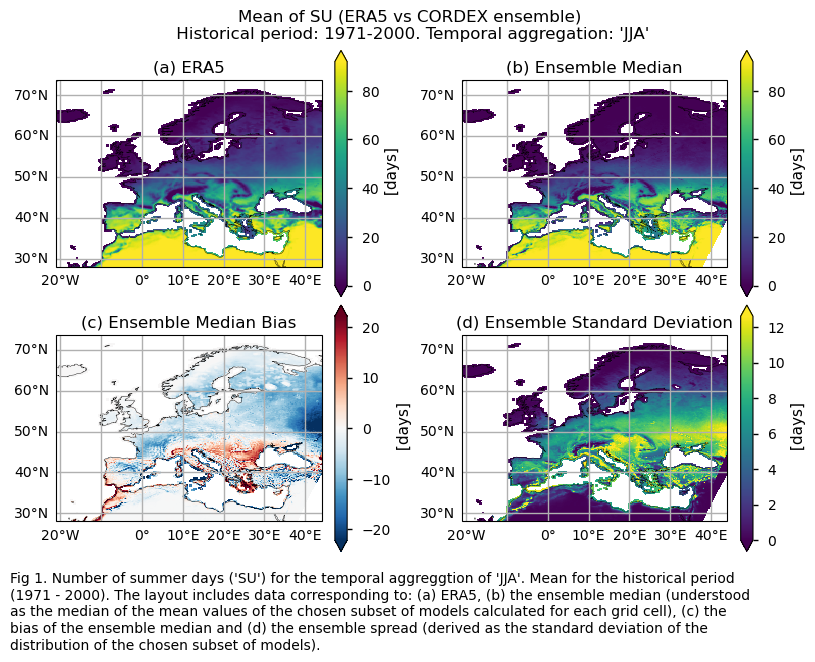

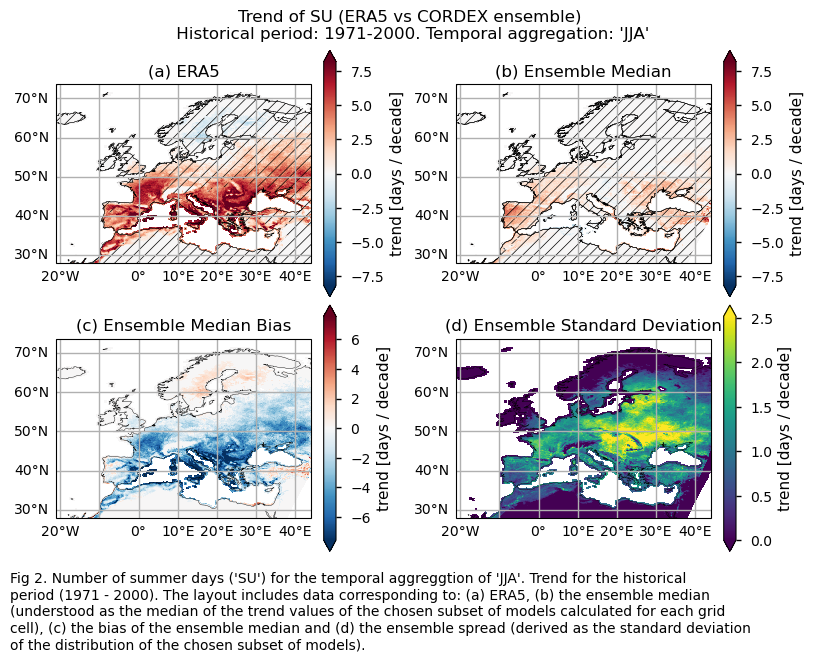

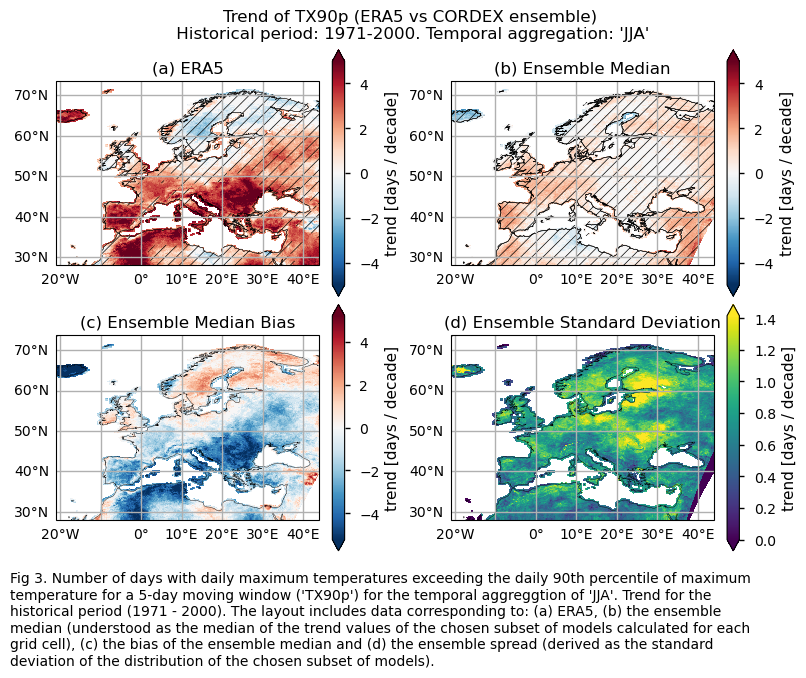

In [11]:
#Fig number counter
fig_number=1

#Common title
common_title = f"Historical period: {year_start}-{year_stop}. Temporal aggregation: '{timeseries}'"

for index in index_names:
    # Index
    da = ds_interpolated[index]
    if (index!="TX90p"):
        fig = plot_ensemble(da_models=da,
                            da_era5=ds_era5[index],
                            cmap=cmaps,
                            cmap_bias=cmaps_bias)
        fig.suptitle(f"Mean of {index} (ERA5 vs {collection_id} ensemble)\n {common_title}")
        add_caption_ensemble(trend=False,exp="historical")
        plt.show()
        fig_number=fig_number+1
        print(f"\n")

    # Trend
    da_trend = ds_interpolated["trend"].sel(index=index)
    da_trend.attrs["units"] = f"{da.attrs['units']} / decade"
    da_era5= ds_era5["trend"].sel(index=index)
    da_era5.attrs["units"] = f"{da.attrs['units']} / decade"
    
    fig = plot_ensemble(
        da_models=da_trend,
        da_era5=da_era5,
        p_value_era5=ds_era5["p"].sel(index=index),
        p_value_models=ds_interpolated["p"].sel(index=index),
        center=0,
        cmap=cmaps_trend,
        cmap_bias=cmaps_bias,
    )
    fig.suptitle(f"Trend of {index} (ERA5 vs {collection_id} ensemble)\n {common_title}")
    add_caption_ensemble(trend=True,exp="historical")
    plt.show()
    fig_number=fig_number+1
    print(f"\n")

(climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-3.3)=
#### 3.3. Plot model maps

In this section, we invoke the `plot_models()` function to visualise the mean values and trends calculated over the historical period (1971-2000) for every model individually across Europe. Note that the model data used in this section maintains its original grid.

Specifically, for each of the indices ('SU' and 'TX90p'), this section presents two layouts:

1. A layout including the historical mean (1971-2000) of every model (only for the 'SU' index).

2. A layout including the historical trend (1971-2000) of every model.

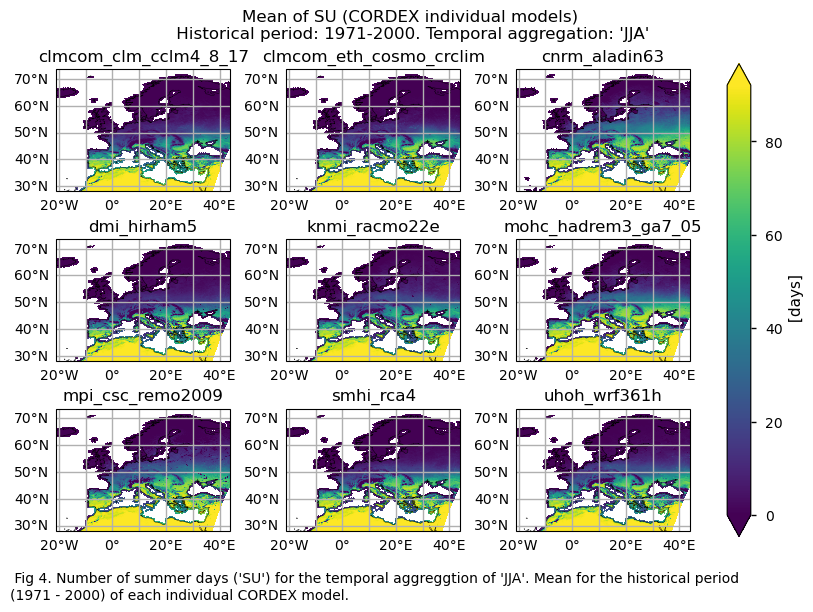

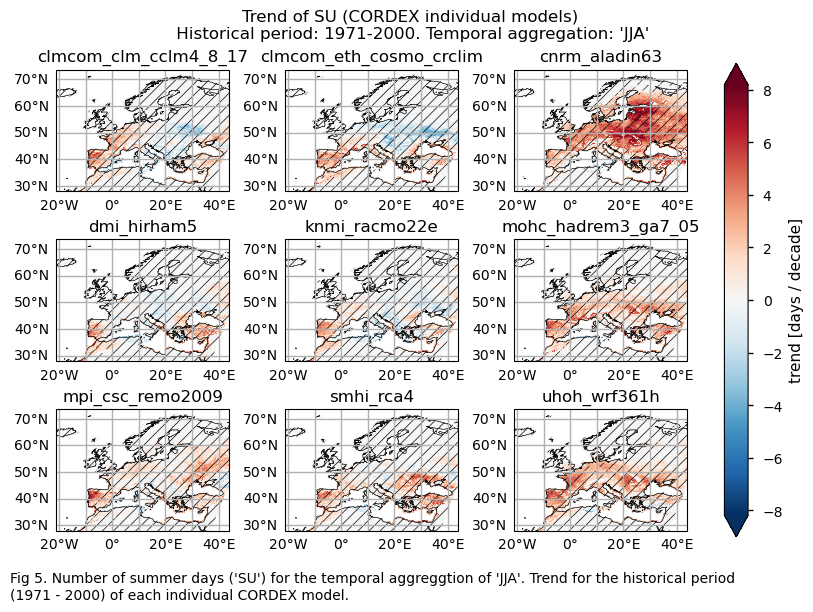

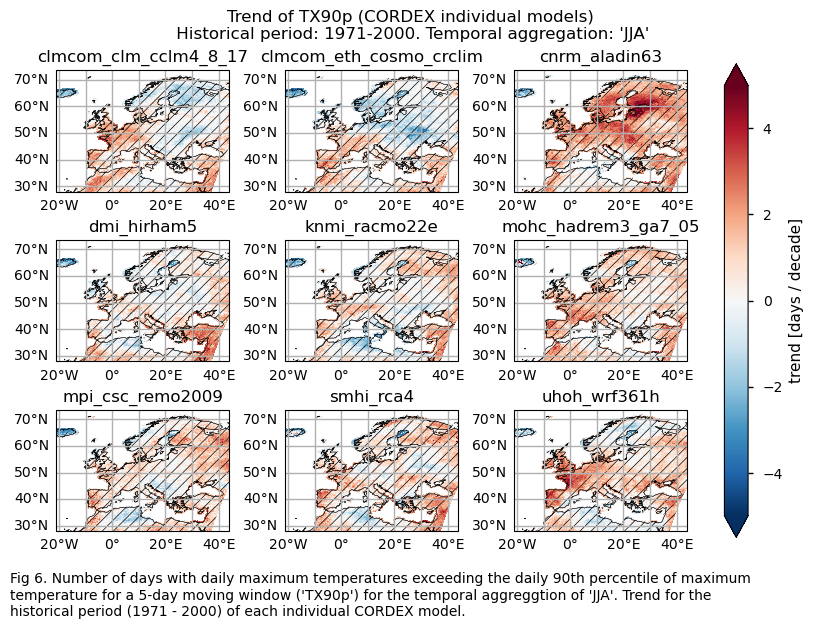

In [12]:
for index in index_names:
    # Index
    da_for_kwargs = ds_era5[index]
    if (index!="TX90p"):
        fig = plot_models(
            data={model: ds[index] for model, ds in model_datasets.items()},
            da_for_kwargs=da_for_kwargs,
            cmap=cmaps
        )
        fig.suptitle(f"Mean of {index} ({collection_id} individual models)\n {common_title}")
        add_caption_models(trend=False,bias=False,exp="historical")
        plt.show()
        print(f"\n")
        fig_number=fig_number+1

    # Trend
    da_for_kwargs_trends = ds_era5["trend"].sel(index=index)
    da_for_kwargs_trends.attrs["units"] = f"{da_for_kwargs.attrs['units']} / decade"
    fig = plot_models(
        data={
            model: ds["trend"].sel(index=index) for model, ds in model_datasets.items()
        },
        da_for_kwargs=da_for_kwargs_trends,
        p_values={
            model: ds["p"].sel(index=index) for model, ds in model_datasets.items()
        },
        center=0,
        cmap=cmaps_trend,
    )
    fig.suptitle(f"Trend of {index} ({collection_id} individual models)\n {common_title}")
    add_caption_models(trend=True,bias=False,exp="historical")
    plt.show()
    print(f"\n")
    fig_number=fig_number+1

(climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-3.4)=
#### 3.4. Plot bias maps

In this section, we invoke the `plot_models()` function to visualise the bias for the mean values and trends calculated over the historical period (1971-2000) for every model individually across Europe. Note that the model data used in this section has previously been interpolated to the ERA5 grid.

Specifically, for each of the indices ('SU' and 'TX90p'), this section presents two layouts:

1. A layout including the bias for the historical mean (1971-2000) of every model (only for the 'SU' index).

2. A layout including the bias for the historical trend (1971-2000) of every model.

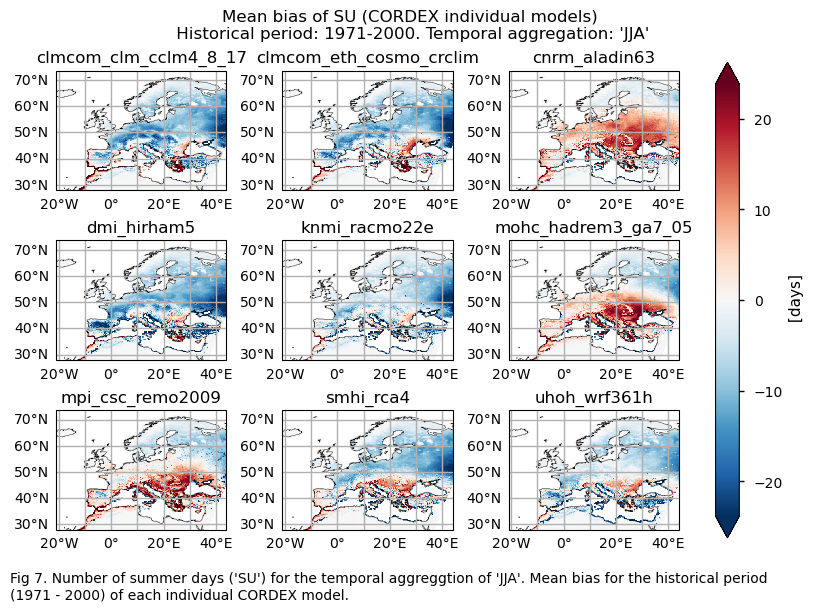

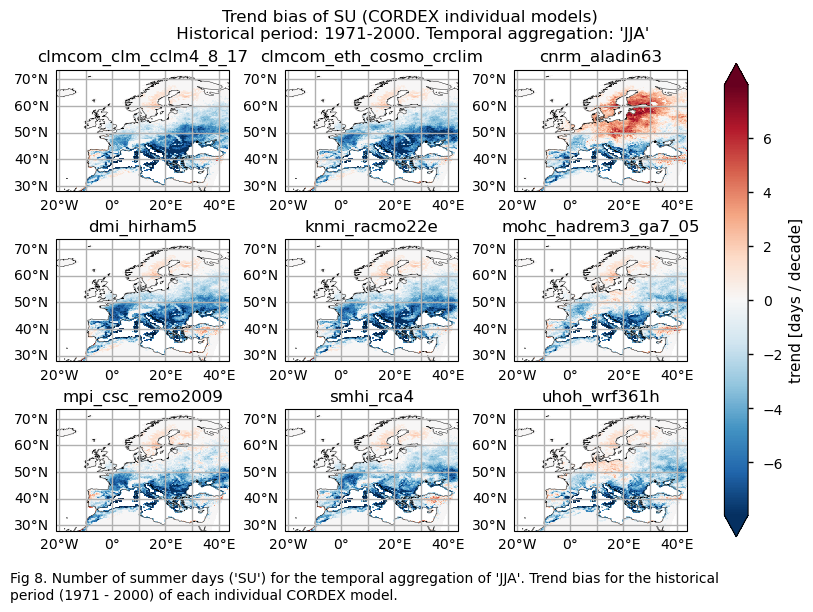

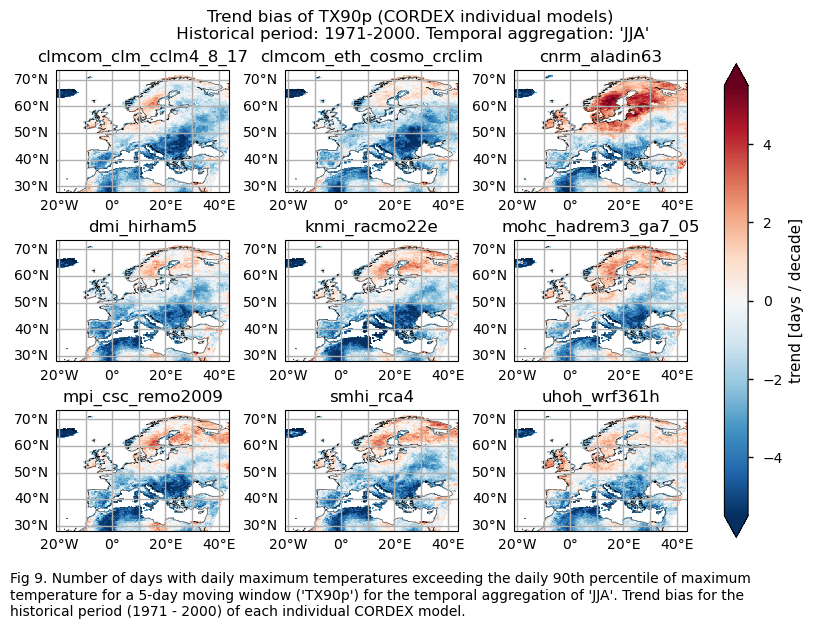

In [13]:
with xr.set_options(keep_attrs=True):
    bias = ds_interpolated - ds_era5

for index in index_names:
    # Index bias
    da = bias[index]
    if (index!="TX90p"):
        fig = plot_models(data=da, center=0,cmap=cmaps_bias)
        fig.suptitle(f"Mean bias of {index} ({collection_id} individual models)\n {common_title}")
        add_caption_models(trend=False,bias=True,exp="historical")
        plt.show()
        print(f"\n")
        fig_number=fig_number+1

    # Trend bias
    da_trend = bias["trend"].sel(index=index)
    da_trend.attrs["units"] = f"{da.attrs['units']} / decade"
    fig = plot_models(data=da_trend, center=0,cmap=cmaps_bias)
    fig.suptitle(f"Trend bias of {index} ({collection_id} individual models)\n {common_title}")
    add_caption_models(trend=True,bias=True,exp="historical")
    plt.show()
    print(f"\n")
    fig_number=fig_number+1
    plt.show()

(climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-3.5)=
#### 3.5. Boxplots of the historical trend

In this last section, we compare the trends of the climate models with the reference trend from ERA5.

Dots represent the spatially-averaged historical trend over the selected region (change of the number of days per decade) for each model (grey), the ensemble mean (blue), and the reference product (orange). The ensemble median is shown as a green line. Note that the spatially averaged values are calculated for each model from its original grid (i.e., no interpolated data has been used here).

The boxplot visually illustrates the distribution of trends among the climate models, with the box covering the first quartile (Q1 = 25th percentile) to the third quartile (Q3 = 75th percentile), and a green line indicating the ensemble median (Q2 = 50th percentile). Whiskers extend from the edges of the box to show the full data range.

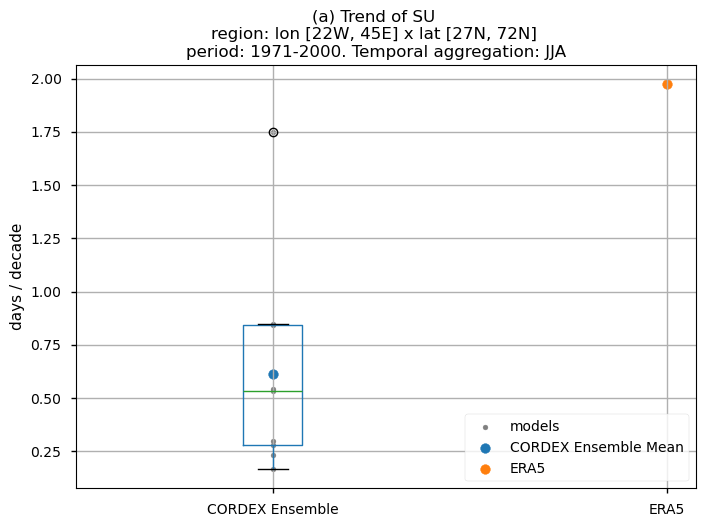

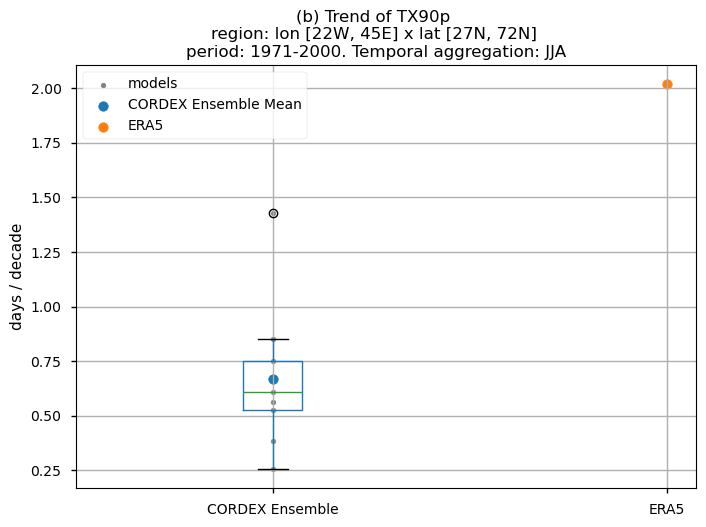

In [14]:
weights = collection_id == "CMIP6"
mean_datasets = [
    diagnostics.spatial_weighted_mean(ds.expand_dims(model=[model]), weights=weights)
    for model, ds in model_datasets.items()
]
mean_ds = xr.concat(mean_datasets, "model", coords='minimal',compat='override')
index_str=1

for index, da in mean_ds["trend"].groupby("index"):
    df_slope = da.to_dataframe()[["trend"]]
    ax = df_slope.boxplot()
    ax.scatter(
        x=[1] * len(df_slope),
        y=df_slope,
        color="grey",
        marker=".",
        label="models",
    )

    # Ensemble mean
    ax.scatter(
            x=1,
            y=da.mean("model"),
            marker="o",
            label=f"{collection_id} Ensemble Mean",
    )

    # ERA5
    labels = [f"{collection_id} Ensemble"]
    da = ds_era5["trend"].sel(index=index)
    da = diagnostics.spatial_weighted_mean(da)
    ax.scatter(
            x=2,
            y=da.values,
            marker="o",
            label="ERA5",
    )
    labels.append("ERA5")

    ax.set_xticks(range(1, len(labels) + 1), labels)
    ax.set_ylabel(f"{ds[index].attrs['units']} / decade")
    plt.suptitle(
            f"({chr(ord('`')+index_str)}) Trend of {index} \n"
            f"region: lon [{-area[1]}W, {area[3]}E] x lat [{area[2]}N, {area[0]}N] \n"
            f"period: {year_start}-{year_stop}. Temporal aggregation: {timeseries}"
    ) 
    plt.legend()
    plt.show()
    index_str=index_str+1

<div>
    <div style="max-width: 800px;">
    <p><strong>Fig 10.</strong> Boxplots illustrating the historical trends of the distribution of the chosen subset of models and ERA5 for: (a) the 'SU' index and (b) the 'TX90p' index. The distribution is created by considering spatially averaged trends across Europe. The ensemble mean and the ensemble median trends are both included. Outliers in the distribution are denoted by a grey circle with a black contour.</p>
    </div>

(climate_projections-cordex-domains-single-levels_climate-and-weather-extremes_q01:section-3.6)=
#### 3.6. Results summary and discussion

- Across the examined region, the selected subset of Regional Climate Models (RCMs) consistently tend to underestimate historical trends compared to ERA5 for the JJA temporal aggregation. Specifically, for the 'SU' index, the CORDEX ensemble median, as derived from boxplots, displays a trend of approximately 0.5 days per decade, contrasting with ERA5's ~2 days per decade. Similarly, the 'TX90p' index reveals around 0.6 days per decade for the CORDEX ensemble median compared to the ~2 days per decade observed in ERA5. The interquartile range spans from approximately 0.25 to 0.75 for the 'SU' index and from 0.5 to 0.75 for the 'TX90p' index. These outcomes align with findings from the assessment done for CMIP6 Global Climate Models (GCMs) but the magnitudes of the trends are more underestimaded.

- While RCMs have demonstrated capability in enhancing GCMs' mean values for the considered indices, their efficacy in replicating historical trends appears limited. Analysing the spatial patterns of trend bias, the ensemble median of the CORDEX models results closely resemble those obtained in the CMIP6 exercise. Notably, the most significant underestimation of trends is evident in the Mediterranean basin.

- In contrast to climatological assessments, the consistency in trend bias patterns across diverse RCMs suggests a potential dependence on the driving GCM, shared among all RCMs. A more extensive GCM-RCM matrix is imperative to accurately quantify this dependency and delineate the partitioning of uncertainty between GCMs and RCMs.

- What do the results mean for users?  Are the biases relevant?

  - For the JJA period and the subset of regional models considered, these outcomes aid in optimising reinsurance protections. However, they are accompanied by uncertainties that require careful consideration for informed decision-making. Users should be aware that biases impact the climatology and trend of the indices differently. In this case, the climatology of the indices appears to be better represented compared to another CMIP6 assessment that covers the same period and seasonal aggregation ("CMIP6 Climate Projections: evaluating bias in extreme temperature indices for the reinsurance sector"), but the trend is more underestimated than in that assessment. Therefore, users should carefully tailor their choice of bias correction method [[6]](https://doi.org/10.1002/asl.1072)[[7]](https://ibicus.readthedocs.io/en/latest/).

<a id='RESULTS NOTE'></a>
<div class="alert alert-block alert-warning">  
<b>RESULTS NOTE</b>:<br> 
It is important to note that the results presented are specific to the 9 models chosen, and users should aim to assess as wide a range of models as possible before making a sub-selection.

## ℹ️ If you want to know more

### Key resources

Some key resources and further reading were linked throughout this assessment.

The CDS catalogue entries for the data used were:
* CORDEX regional climate model data on single levels (Daily mean - Maximum 2m temperature in the last 24 hours): https://cds.climate.copernicus.eu/datasets/projections-cordex-domains-single-levels?tab=overview
* ERA5 hourly data on single levels from 1940 to present (2m temperature): https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels?tab=overview


Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [BOpen](https://www.bopen.eu/)
* [icclim](https://icclim.readthedocs.io/en/stable/) Python package
  
### References
[[1]](https://doi.org/10.3390/atmos11020146) Tesselaar, M., Botzen, W.J.W., Aerts, J.C.J.H. (2020). Impacts of Climate Change and Remote Natural Catastrophes on EU Flood Insurance Markets: An Analysis of Soft and Hard Reinsurance Markets for Flood Coverage. Atmosphere 2020, 11, 146. https://doi.org/10.3390/atmos11020146.

[[2]](https://doi.org/10.5194/nhess-22-659-2022) Rädler, A. T. (2022). Invited perspectives: how does climate change affect the risk of natural hazards? Challenges and step changes from the reinsurance perspective. Nat. Hazards Earth Syst. Sci., 22, 659–664. https://doi.org/10.5194/nhess-22-659-2022.

[[3]](https://www.ipcc.ch/site/assets/uploads/2018/03/wg2TARchap8.pdf) Vellinga, P., Mills, E., Bowers, L., Berz, G.A., Huq, S., Kozak, L.M., Paultikof, J., Schanzenbacker, B., Shida, S., Soler, G., Benson, C., Bidan, P., Bruce, J.W., Huyck, P.M., Lemcke, G., Peara, A., Radevsky, R., Schoubroeck, C.V., Dlugolecki, A.F. (2001). Insurance and other financial services. In J. J. McCarthy, O. F. Canziani, N. A. Leary, D. J. Dokken, & K. S. White (Eds.), Climate change 2001: impacts, adaptation, and vulnerability. Contribution of working group 2 to the third assessment report of the intergovernmental panel on climate change. (pp. 417-450). Cambridge University Press.

[[4]](https://doi.org/10.1002/wcc.71) Lemos, M.C. and Rood, R.B. (2010). Climate projections and their impact on policy and practice. WIREs Clim Chg, 1: 670-682. https://doi.org/10.1002/wcc.71

[[5]](https://doi.org/10.1002/wcc.579) Nissan H, Goddard L, de Perez EC, et al. (2019). On the use and misuse of climate change projections in international development. WIREs Clim Change, 10:e579. https://doi.org/10.1002/wcc.579

[[6]](https://doi.org/10.1002/asl.1072) Iturbide, M., Casanueva, A., Bedia, J., Herrera, S., Milovac, J., Gutiérrez, J.M. (2021). On the need of bias adjustment for more plausible climate change projections of extreme heat. Atmos. Sci. Lett., 23, e1072. https://doi.org/10.1002/asl.1072

[[7]](https://ibicus.readthedocs.io/en/latest/) https://ibicus.readthedocs.io/en/latest/.

[[8]](https://doi.org/10.1002/wcc.8) Rummukainen, M. (2010). State-of-the-art with regional climate models. WIREs Clim Change, 1: 82-96. https://doi.org/10.1002/wcc.8

[[9]](https://doi.org/10.1088/1748-9326/aacc77) Silje Lund Sørland et al. (2018). Bias patterns and climate change signals in GCM-RCM model chains. Environ. Res. Lett. 13 074017. https://doi.org/10.1088/1748-9326/aacc77